## EDA - Exploratory Data Analysis

En esta etapa del proyecto, se llevara a cabo el analisis exploratorio de los datos. Haremos un analisis exahustivo de los datasets obtenidos durante la etapa de ETL (Extract, Transform and Load), y así, podremos decidir que variables utilizar para nuestro modelo de recomendación.

#### Importación de librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from wordcloud import WordCloud
import FuncionExtra as f

#### Lectura de los datasets

In [2]:
steam_games = pd.read_csv('../steam_games_limpio.csv')

user_reviews = pd.read_csv('../user_reviews_limpio.csv')

user_items = pd.read_csv('../user_items_limpio.csv')

sentiment_analysis = pd.read_csv('../sentiment_analysis.csv')

#### EDA dataset **steam_games**

Dataset que contiene la información de los items de Steam

Información general:

In [3]:
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74834 entries, 0 to 74833
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     59193 non-null  object 
 1   app_name      74831 non-null  object 
 2   title         72783 non-null  object 
 3   url           74834 non-null  object 
 4   tags          74649 non-null  object 
 5   specs         73893 non-null  object 
 6   price         74834 non-null  float64
 7   early_access  74834 non-null  float64
 8   id            74833 non-null  float64
 9   developer     71355 non-null  object 
 10  release_year  72621 non-null  float64
 11  genres        71551 non-null  object 
dtypes: float64(4), object(8)
memory usage: 6.9+ MB


Vemos el porcentaje de nulos por columna:

In [4]:
f.porcentaje_valores_nulos(steam_games)

La columna publisher tiene un  20.90 % de valores nulos
La columna app_name tiene un  0.00 % de valores nulos
La columna title tiene un  2.74 % de valores nulos
La columna url tiene un  0.00 % de valores nulos
La columna tags tiene un  0.25 % de valores nulos
La columna specs tiene un  1.26 % de valores nulos
La columna price tiene un  0.00 % de valores nulos
La columna early_access tiene un  0.00 % de valores nulos
La columna id tiene un  0.00 % de valores nulos
La columna developer tiene un  4.65 % de valores nulos
La columna release_year tiene un  2.96 % de valores nulos
La columna genres tiene un  4.39 % de valores nulos


Ninguna tiene un porcentaje tan alto como para eliminarla.

Estadistica descriptiva de variables númericas:

In [5]:
steam_games.describe()

,price,early_access,id,release_year
count,74834.000000,74834.000000,7.483300e+04,72621.000000
mean,8.405883,0.086899,4.662488e+05,2015.204968
std,15.923128,0.281689,1.731647e+05,2.924554
min,0.000000,0.000000,1.000000e+01,1970.000000
25%,1.990000,0.000000,3.441400e+05,2015.000000
50%,4.990000,0.000000,4.626700e+05,2016.000000
75%,9.990000,0.000000,6.020700e+05,2017.000000
max,995.000000,1.000000,2.028850e+06,2024.000000


Estadistica descriptiva de variables categoricas:

In [6]:
columnas_object = steam_games.select_dtypes(include=['object']).columns

In [7]:
df = steam_games[columnas_object]

In [8]:
df.describe()

,publisher,app_name,title,url,tags,specs,developer,genres
count,59193,74831,72783,74834,74649,73893,71355,71551
unique,8236,32094,30054,32133,15395,4649,10992,22
top,KISS ltd,AutoTileSet,AutoTileSet,http://store.steampowered.com/app/313320/AutoT...,"['Casual', 'Simulation']",['Single-player'],Ubisoft - San Francisco,Indie
freq,807,11,11,11,2581,6298,2516,15858


Cantidad de registros unicos segun **id**:

In [9]:
steam_games['id'].nunique()

32132

Vemos el formato y que años de lanzamiento tenemos:

In [10]:
steam_games['release_year'].unique()

array([2018., 2017.,   nan, 1997., 1998., 2016., 2006., 2005., 2003.,
       2007., 2002., 2000., 1995., 1996., 1994., 2001., 1993., 2004.,
       1999., 2008., 2009., 1992., 1989., 2010., 2011., 2013., 2012.,
       2014., 1983., 1984., 2015., 1990., 1988., 1991., 1985., 1982.,
       1987., 2020., 2019., 1981., 1986., 2022., 2021., 1975., 1970.,
       1980., 2024.])

Distribución de juegos, segun año de lanzamiento:

In [11]:
game_year = steam_games['release_year'].value_counts()

game_year


release_year
2017.0    25509
2016.0    17935
2015.0    12423
2014.0     6471
2013.0     3091
2012.0     2161
2011.0     1035
2010.0      706
2018.0      596
2009.0      513
2008.0      351
2007.0      277
2006.0      230
2005.0      149
2003.0      128
2001.0      119
2004.0      107
1999.0       87
1998.0       86
2002.0       70
1997.0       67
1996.0       60
2000.0       60
1994.0       56
2019.0       53
1995.0       51
1993.0       49
1992.0       26
1991.0       26
2020.0       18
1990.0       16
2021.0       16
1989.0       14
1988.0       11
1987.0       10
2022.0        9
1984.0        7
1983.0        6
1986.0        5
2024.0        4
1981.0        3
1982.0        3
1985.0        3
1970.0        2
1975.0        1
1980.0        1
Name: count, dtype: int64

Garficamos:

C:\Users\ferna\AppData\Local\Temp\ipykernel_872\4283867546.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= game_year.index.astype(int), y= game_year.values, palette='plasma')


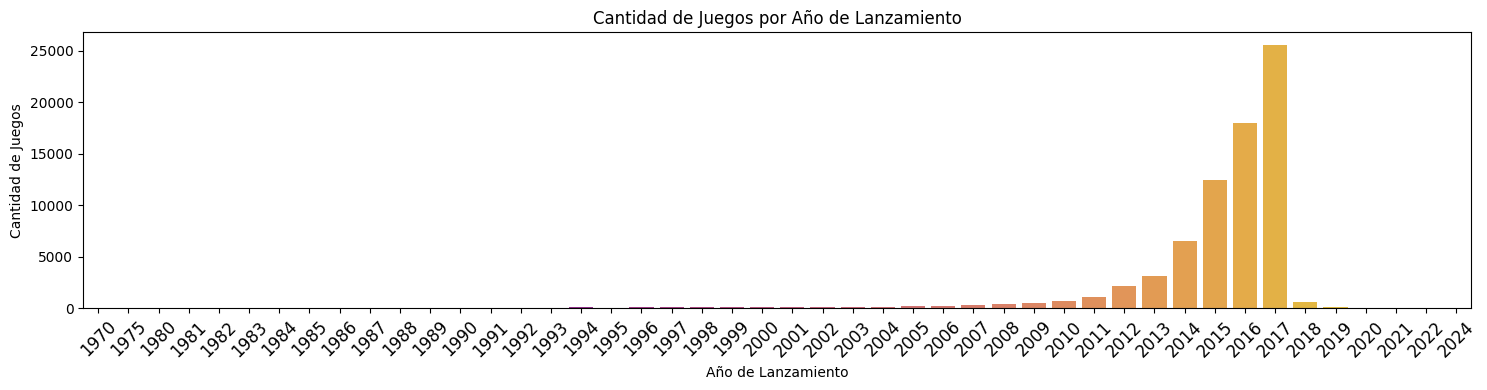

In [12]:
plt.figure(figsize=(15, 4))

sns.barplot(x= game_year.index.astype(int), y= game_year.values, palette='plasma')
plt.title('Cantidad de Juegos por Año de Lanzamiento')
plt.xlabel('Año de Lanzamiento') 
plt.ylabel('Cantidad de Juegos')

plt.xticks(rotation= 45, fontsize=12)
plt.tight_layout()

plt.show()

Distribución de juegos según genero:

In [13]:
genre_year = steam_games['genres'].value_counts().sort_values(ascending=False)

genre_year

genres
Indie                      15858
Action                     11319
Casual                      8282
Adventure                   8242
Strategy                    6957
Simulation                  6699
RPG                         5479
Free to Play                2031
Early Access                1462
Sports                      1257
Massively Multiplayer       1108
Racing                      1083
Design and Illustration      460
Utilities                    340
Web Publishing               268
Animation and Modeling       183
Education                    125
Video Production             116
Software Training            105
Audio Production              93
Photo Editing                 77
Accounting                     7
Name: count, dtype: int64

Graficamos:

C:\Users\ferna\AppData\Local\Temp\ipykernel_872\4173398863.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=steam_games, y='genres', orient='h', palette='plasma', order=steam_games['genres'].value_counts().sort_values(ascending= False).index)


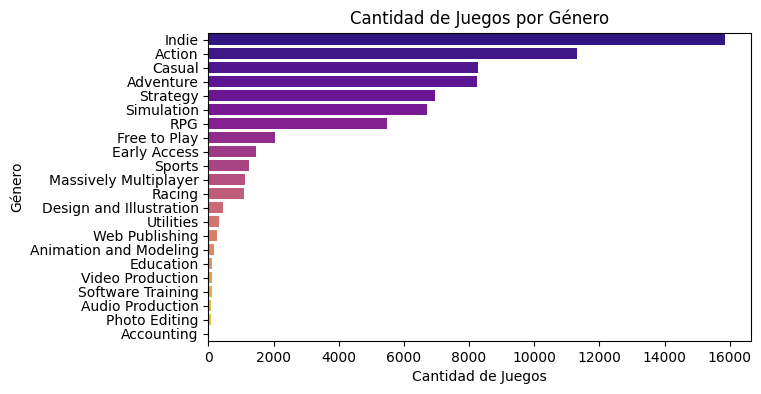

In [14]:
plt.figure(figsize=(7, 4))

sns.countplot(data=steam_games, y='genres', orient='h', palette='plasma', order=steam_games['genres'].value_counts().sort_values(ascending= False).index)

plt.title('Cantidad de Juegos por Género')
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Género')

plt.show()

Distribución de precios:

Obtenemos el precio para cada juego:

In [15]:
precios = steam_games.groupby('id')['price'].unique().reset_index().explode('price')

Nos quedamos solo con nuestros precios distintos a '--', ya que ese valor reemplaza a los valore nulos:

In [16]:
precios = precios[precios['price'] != '--']

Cambiamos el tipo de dato de la columna **price** a float:

In [17]:
precios['price'] = precios['price'].astype(float)

Graficamos:

C:\Users\ferna\AppData\Local\Temp\ipykernel_872\3256121030.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'price', data = precios, linewidth = 2, palette = 'plasma')


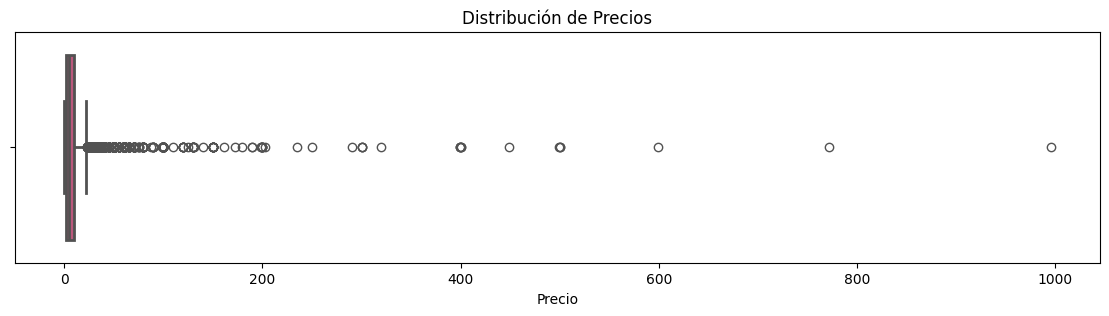

In [18]:
plt.figure(figsize = (14, 3))

sns.boxplot(x = 'price', data = precios, linewidth = 2, palette = 'plasma') 
plt.title('Distribución de Precios')
plt.xlabel('Precio')

plt.show()

Vemos claramente, la presencia de outliers. 

Estadistica descriptiva del DataFrame **precios**:

In [19]:
precios.describe()

,id,price
count,3.213200e+04,32132.000000
mean,4.517524e+05,8.514090
std,1.827147e+05,16.086051
min,1.000000e+01,0.000000
25%,3.292775e+05,1.990000
50%,4.520300e+05,4.990000
75%,5.933925e+05,9.990000
max,2.028850e+06,995.000000


Filtramos los precios, menores a 100, para ver mas en detalle:

In [20]:
precios_filter = precios[precios['price'] < 100]

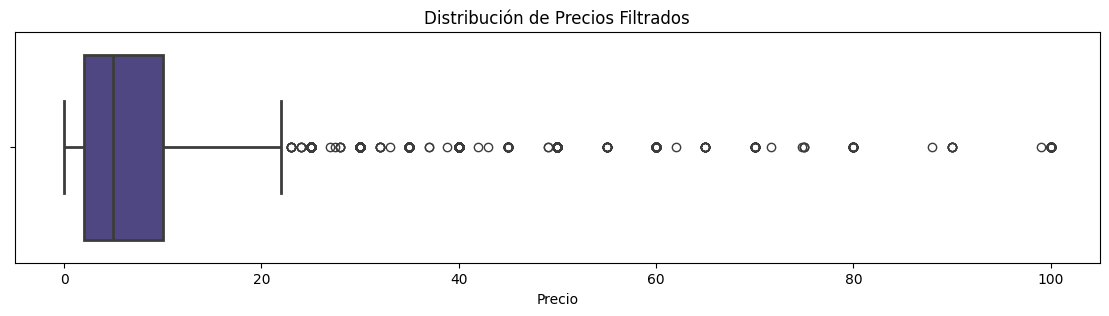

In [21]:
plt.figure(figsize = (14, 3))

sns.boxplot(x = 'price', data = precios_filter, linewidth = 2, color= 'darkslateblue') 
plt.title('Distribución de Precios Filtrados')
plt.xlabel('Precio')

plt.show()

Vemos que los outliers comienzan pasados los 20 USD. Asique procedemos a contarlos:

In [22]:
cantidad_outliers = (precios['price'] > 22).sum()

print(f'La cantidad de outliers es de: {cantidad_outliers}')

La cantidad de outliers es de: 1875


Vemos el porcentaje de outlires:

In [23]:
porcentaje_outlires = round((cantidad_outliers / (precios['price'].count())) * 100, 2)

print(f'El porcentaje de outliers es de: {porcentaje_outlires}%')

El porcentaje de outliers es de: 5.84%


Al ver la cantidad de outliers sobre el total de registros y el porcentaje de outliers, determinamos que estos, no modifican nuestro dataset. Hay juegos que pueden valer mas de 20 USD y llegar hasta los 200 USD, pero ya pasando ese monto, podemos clasificarlos como errores de registro o similares.

#### EDA dataset **user_reviews**

Información general:

In [24]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58431 entries, 0 to 58430
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   funny        8010 non-null   object 
 1   posted       48498 non-null  float64
 2   last_edited  6037 non-null   object 
 3   item_id      58431 non-null  int64  
 4   helpful      58431 non-null  object 
 5   recommend    58431 non-null  bool   
 6   review       58401 non-null  object 
 7   user_id      58431 non-null  object 
 8   user_url     58431 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 3.6+ MB


Porcentaje de nulos:

In [25]:
f.porcentaje_valores_nulos(user_reviews)

La columna funny tiene un  86.29 % de valores nulos
La columna posted tiene un  17.00 % de valores nulos
La columna last_edited tiene un  89.67 % de valores nulos
La columna item_id tiene un  0.00 % de valores nulos
La columna helpful tiene un  0.00 % de valores nulos
La columna recommend tiene un  0.00 % de valores nulos
La columna review tiene un  0.05 % de valores nulos
La columna user_id tiene un  0.00 % de valores nulos
La columna user_url tiene un  0.00 % de valores nulos


Vemos que las columnas **funny** y **last_edited**, tiene un porcentaje muy alto de nulos, asique las eliminamos:

In [26]:
user_reviews.drop(columns=['funny', 'last_edited'], inplace=True)

Estadistica descriptiva de variables numericas:

In [27]:
user_reviews.describe()

,posted,item_id
count,48498.000000,58431.000000
mean,2014.148150,169703.670586
std,0.842611,132019.789420
min,2010.000000,10.000000
25%,2014.000000,8930.000000
50%,2014.000000,218230.000000
75%,2015.000000,261640.000000
max,2015.000000,527340.000000


Estadistica descriptiva de variables categoricas:

In [28]:
columnas_object_reviews = user_reviews.select_dtypes(include=['object']).columns

In [29]:
df_reviews = user_reviews[columnas_object_reviews]

In [30]:
df_reviews.describe()

,helpful,review,user_id,user_url
count,58431,58401,58431,58431
unique,1344,55312,25458,25458
top,No ratings yet,good game,76561198108415635,http://steamcommunity.com/profiles/76561198108...
freq,29732,98,10,10


Vemos la cantidad de usuarios unicos:

In [31]:
user_reviews['user_id'].nunique()

25458

Distribución de recomendaciones hechas:

In [32]:
recommend = user_reviews['recommend'].value_counts()

recommend

recommend
True     51692
False     6739
Name: count, dtype: int64

Graficamos:

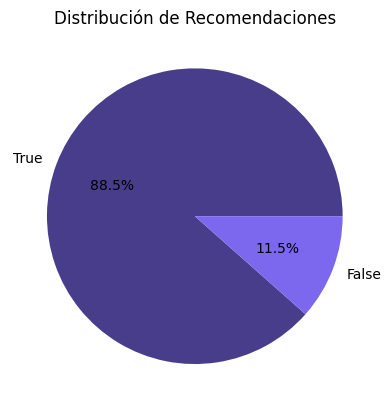

In [33]:
user_reviews['recommend'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['darkslateblue', 'mediumslateblue'])

plt.title('Distribución de Recomendaciones')
plt.axis('off')
plt.show()

Distribución de las categorias del Sentiment Analysis:

In [34]:
sentiment_analysis['sentiment_analysis'].value_counts()

sentiment_analysis
2    25888
1    24573
0     7970
Name: count, dtype: int64

Recordemos que las categorias siguen este patron:
- 0: Opiniones negativas
- 1: Opiniones neutras
- 2: Opiniones positivas

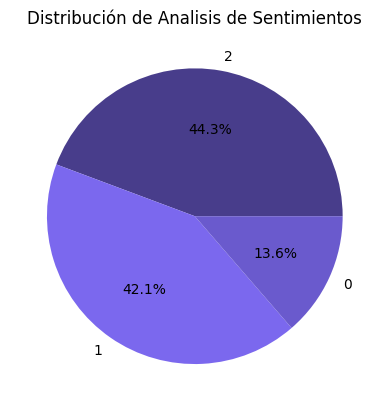

In [35]:
sentiment_analysis['sentiment_analysis'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['darkslateblue', 'mediumslateblue', 'slateblue'])

plt.title('Distribución de Analisis de Sentimientos')
plt.axis('off')
plt.show()

#### EDA dataset **user_items**

Información general:

In [36]:
user_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094105 entries, 0 to 5094104
Data columns (total 8 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   item_id           int64 
 1   item_name         object
 2   playtime_forever  int64 
 3   playtime_2weeks   int64 
 4   user_id           object
 5   items_count       int64 
 6   steam_id          int64 
 7   user_url          object
dtypes: int64(5), object(3)
memory usage: 310.9+ MB


Porcentaje de nulos por columna:

In [37]:
f.porcentaje_valores_nulos(user_items) 

La columna item_id tiene un  0.00 % de valores nulos
La columna item_name tiene un  0.00 % de valores nulos
La columna playtime_forever tiene un  0.00 % de valores nulos
La columna playtime_2weeks tiene un  0.00 % de valores nulos
La columna user_id tiene un  0.00 % de valores nulos
La columna items_count tiene un  0.00 % de valores nulos
La columna steam_id tiene un  0.00 % de valores nulos
La columna user_url tiene un  0.00 % de valores nulos


Estadistica descriptiva de variables númericas:

In [38]:
user_items.describe()

,item_id,playtime_forever,playtime_2weeks,items_count,steam_id
count,5.094105e+06,5.094105e+06,5.094105e+06,5.094105e+06,5.094105e+06
mean,1.783916e+05,9.905511e+02,9.069004e+00,3.157324e+02,7.656120e+16
std,1.318516e+05,5.414297e+03,1.403145e+02,6.969073e+02,3.917652e+07
min,1.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,7.656120e+16
25%,3.445000e+04,0.000000e+00,0.000000e+00,7.100000e+01,7.656120e+16
50%,2.144200e+05,3.400000e+01,0.000000e+00,1.370000e+02,7.656120e+16
75%,2.664300e+05,3.550000e+02,0.000000e+00,2.750000e+02,7.656120e+16
max,5.307200e+05,6.427730e+05,1.996700e+04,7.762000e+03,7.656120e+16


Estadistica descriptiva de variables categoricas:

In [39]:
columnas_object_items = user_items.select_dtypes(include=['object']).columns

In [40]:
df_items = user_items[columnas_object_items]

In [41]:
df_items.describe()

,item_name,user_id,user_url
count,5094105,5094105,5094105
unique,10947,70912,70912
top,Dota 2 Test,phrostb,http://steamcommunity.com/id/phrostb
freq,49136,7762,7762


Vemos la cantidad de items unicos:

In [42]:
user_items['item_name'].nunique()

10947

Conteo de items por titulo:

In [43]:
user_items['item_name'].value_counts()


item_name
Dota 2 Test                               49136
Counter-Strike: Global Offensive          43336
Garry's Mod                               42849
Unturned                                  38278
Left 4 Dead 2 Beta                        36661
                                          ...  
Preston Sterling                              1
Happy Town People                             1
Kapsul Infinite                               1
Warhammer 40,000: Armageddon - Da Orks        1
Arachnophobia                                 1
Name: count, Length: 10947, dtype: int64

Vemos los usuarios con más horas jugadas:

In [44]:
user_by_time = user_items.groupby('user_id')['playtime_forever'].sum().sort_values(ascending=False)

Seleccionamos los 5 usuarios con más horas jugadas:

In [45]:
user_by_time = user_by_time.head(5)

Graficamos:

C:\Users\ferna\AppData\Local\Temp\ipykernel_872\3459801855.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=user_by_time.index, y=user_by_time.values, palette='plasma')


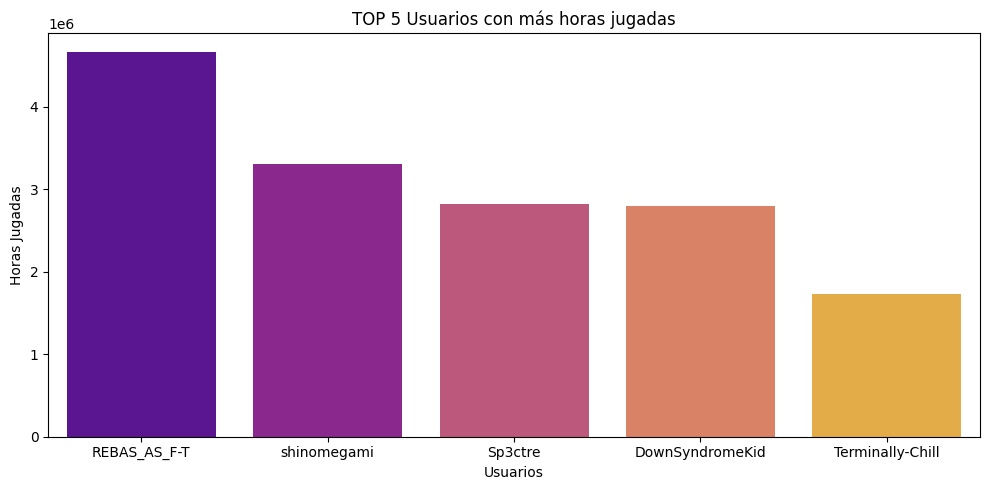

In [46]:
plt.figure(figsize=(10, 5))

sns.barplot(x=user_by_time.index, y=user_by_time.values, palette='plasma')
plt.title('TOP 5 Usuarios con más horas jugadas')
plt.xlabel('Usuarios')
plt.ylabel('Horas Jugadas')

plt.tight_layout()

plt.show()

Nube de palabras según aparición de **item_name**:

Contamos la cantidad de registros por **item_name**

In [47]:
aparicion_name = user_items['item_name'].value_counts().reset_index()

aparicion_name

,item_name,count
0,Dota 2 Test,49136
1,Counter-Strike: Global Offensive,43336
2,Garry's Mod,42849
3,Unturned,38278
4,Left 4 Dead 2 Beta,36661
...,...,...
10942,Preston Sterling,1
10943,Happy Town People,1
10944,Kapsul Infinite,1
10945,"Warhammer 40,000: Armageddon - Da Orks",1


Agregamos dos columnas nuevas, para crear un diccionario con la frecuencia de cada item

In [48]:
aparicion_name.columns = ['item', 'frecuencia']

In [49]:
aparicion_name

,item,frecuencia
0,Dota 2 Test,49136
1,Counter-Strike: Global Offensive,43336
2,Garry's Mod,42849
3,Unturned,38278
4,Left 4 Dead 2 Beta,36661
...,...,...
10942,Preston Sterling,1
10943,Happy Town People,1
10944,Kapsul Infinite,1
10945,"Warhammer 40,000: Armageddon - Da Orks",1


Creamos el diccionario:

In [50]:
dict_name = dict(zip(aparicion_name['item'], aparicion_name['frecuencia']))

Creamos el objeto Word Cloud

In [51]:
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Purples_r', max_words= 40)
wordcloud.generate_from_frequencies(dict_name)

Graficamos:

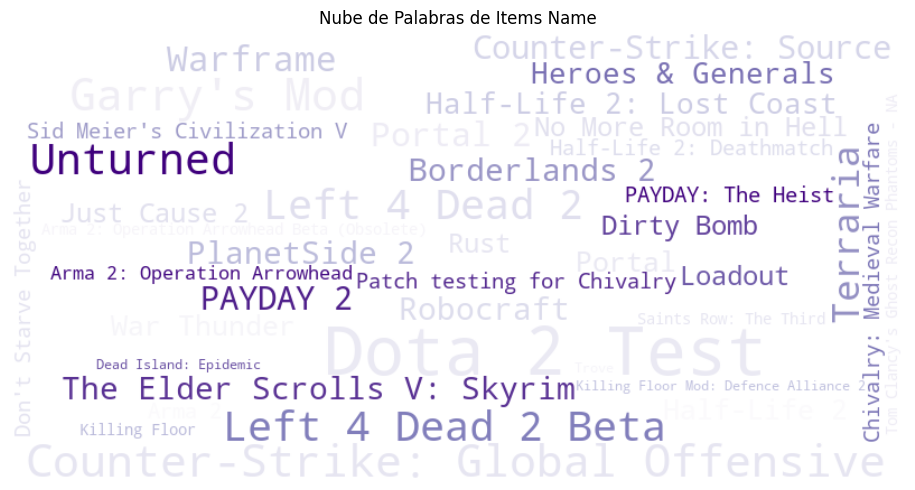

In [52]:
plt.figure(figsize=(10, 5))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')
plt.title('Nube de Palabras de Items Name')
plt.tight_layout()
plt.show()